**Import required libraries** (Done by Everyone)

In [668]:
# Loading Numpy and Pandas
import numpy as np
import pandas as pd

# Loading Image handing libraries
import os
import cv2
import pathlib
from PIL import Image
from skimage.io import imread

# loading sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# loading libraries for data visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Others
import time
import datetime
import random

**Assign Path Directories and Pre-defining variables** (Done by P'ng Xun)

In [624]:
# determine the path to enable quick altering if there are changes
train_path = "input/Train"
test_path = "input/Test" 
meta_path = "input/Meta"

# Image Resizing variables 
HEIGHT = 30
WIDTH = 30
channels = 3

**Loading dataset** (Done by Leong Wai Yin)

In [625]:
train = pd.read_csv("Train.csv") 
train.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,56,57,6,5,51,52,0,Train/0/00001_00000_00000.png
1,55,57,5,6,50,52,0,Train/0/00001_00000_00001.png
2,56,56,5,6,51,51,0,Train/0/00001_00000_00002.png
3,58,58,6,6,53,52,0,Train/0/00001_00000_00003.png
4,59,59,6,6,54,53,0,Train/0/00001_00000_00004.png
5,57,59,5,6,52,54,0,Train/0/00001_00000_00005.png
6,57,59,5,5,52,54,0,Train/0/00001_00000_00006.png
7,57,59,5,5,52,53,0,Train/0/00001_00000_00007.png
8,60,60,6,6,54,54,0,Train/0/00001_00000_00008.png
9,61,61,5,6,55,56,0,Train/0/00001_00000_00009.png


In [626]:
test = pd.read_csv("Test.csv")
test.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,25,26,5,5,20,21,0,Test/00815.png
1,25,26,5,5,20,21,0,Test/08316.png
2,25,26,5,5,20,21,0,Test/11537.png
3,25,27,5,6,20,22,0,Test/12169.png
4,25,26,5,6,20,21,3,Test/00995.png
5,25,26,5,6,20,21,3,Test/03163.png
6,25,31,5,6,20,26,3,Test/09635.png
7,25,27,5,5,20,21,3,Test/12401.png
8,25,32,5,6,20,27,8,Test/12416.png
9,26,28,5,5,21,23,0,Test/00622.png


**Data Exploration and Visualisation**

In [627]:
# Loading train images and their respective classes (Done by P'ng Xun)

train_x=[]
train_x_vis=[]

for i in train['Path']:
    try:
        img = Image.fromarray(cv2.imread("input/" + i), 'RGB')
        train_x.append(np.array(img.resize((HEIGHT, WIDTH))))
        train_x_vis.append(np.array(img.resize((1,1)))) #For data visualization
    except AttributeError:
        print("Error in loading image")
train_x=np.array(train_x)
train_x_vis=np.array(train_x_vis)
train_y = np.array(train['ClassId'].values)
train_x.shape

(13890, 30, 30, 3)

In [628]:
# Loading train images and their respective classes (Done by P'ng Xun)

test_x=[]

for i in test['Path']:
    try:
        img = Image.fromarray(cv2.imread("input/" + i), 'RGB')
        test_x.append(np.array(img.resize((HEIGHT, WIDTH))))
    except AttributeError:
        print("Error in loading image")
test_x=np.array(test_x)
test_y = np.array(test['ClassId'].values)
test_x.shape

(4530, 30, 30, 3)

In [630]:
# finding total num of classes (Done by Leong Wai Yin)
num_classes= len(os.listdir(train_path))
print(num_classes)

10


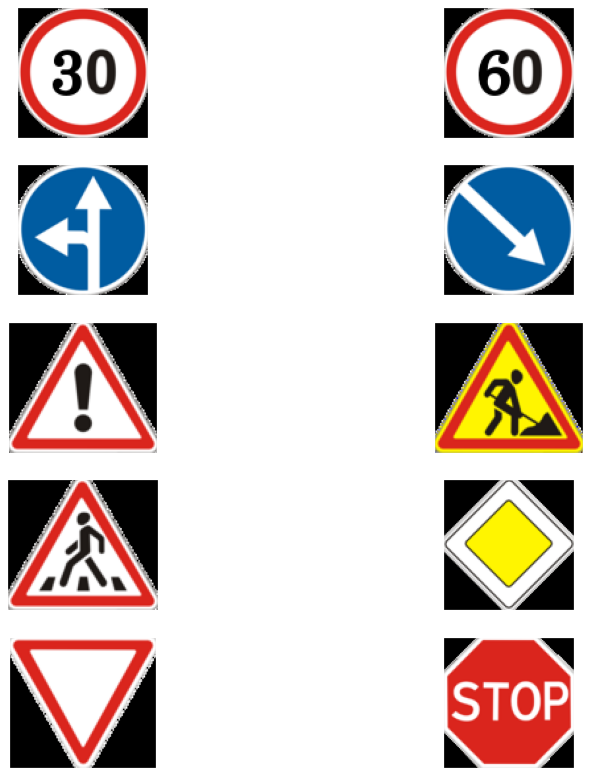

In [671]:
# Function to view the sample image of each class (Done by Leong Wai Yin)
img_dir = pathlib.Path(meta_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(num_classes):
    plt.subplot(5, 2, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}.png'))[0]
    img = load_img(sign)
    plt.imshow(img)
plt.show()

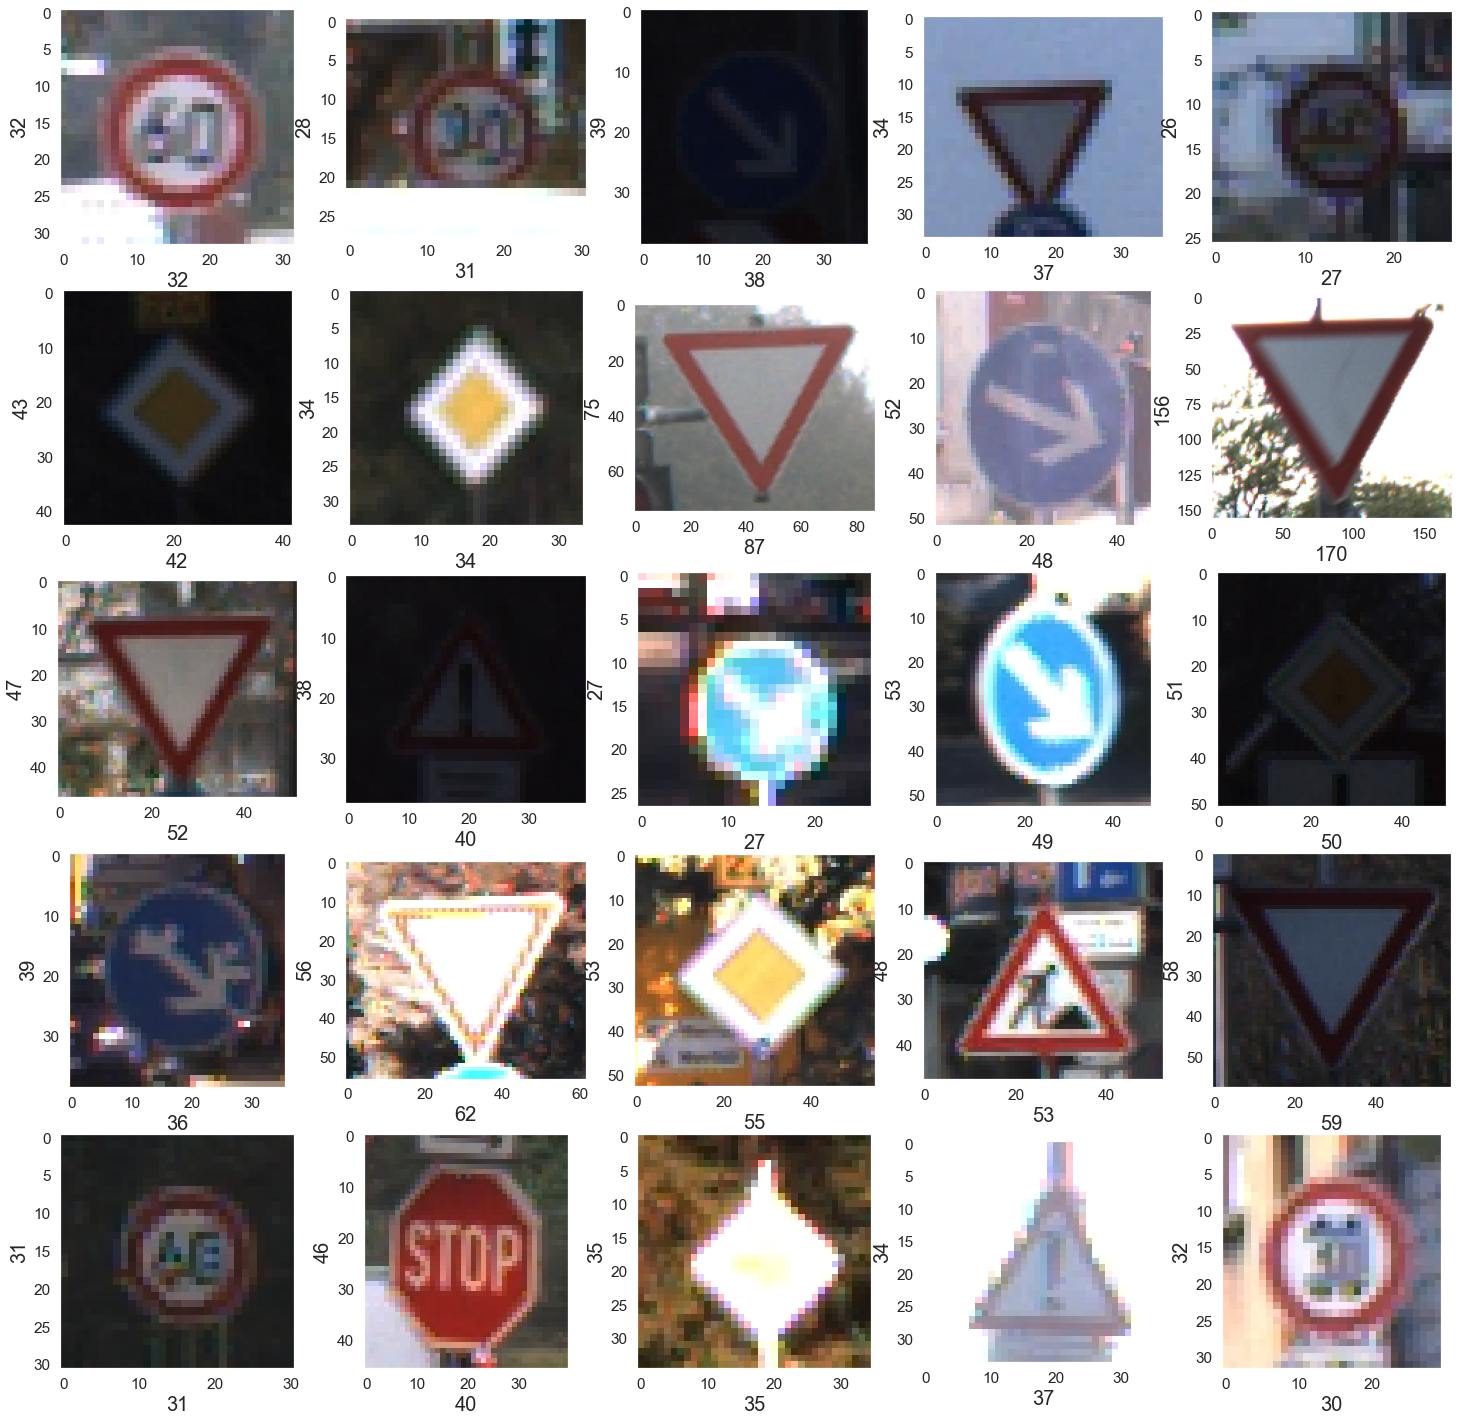

In [632]:
# Visualizing 25 random images from test data (Done by Leong Wai Yin)
images = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = "input\\" + random.choice(images)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=False)
    plt.xlabel(rand_img.shape[1], fontsize = 20) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20) # height of image

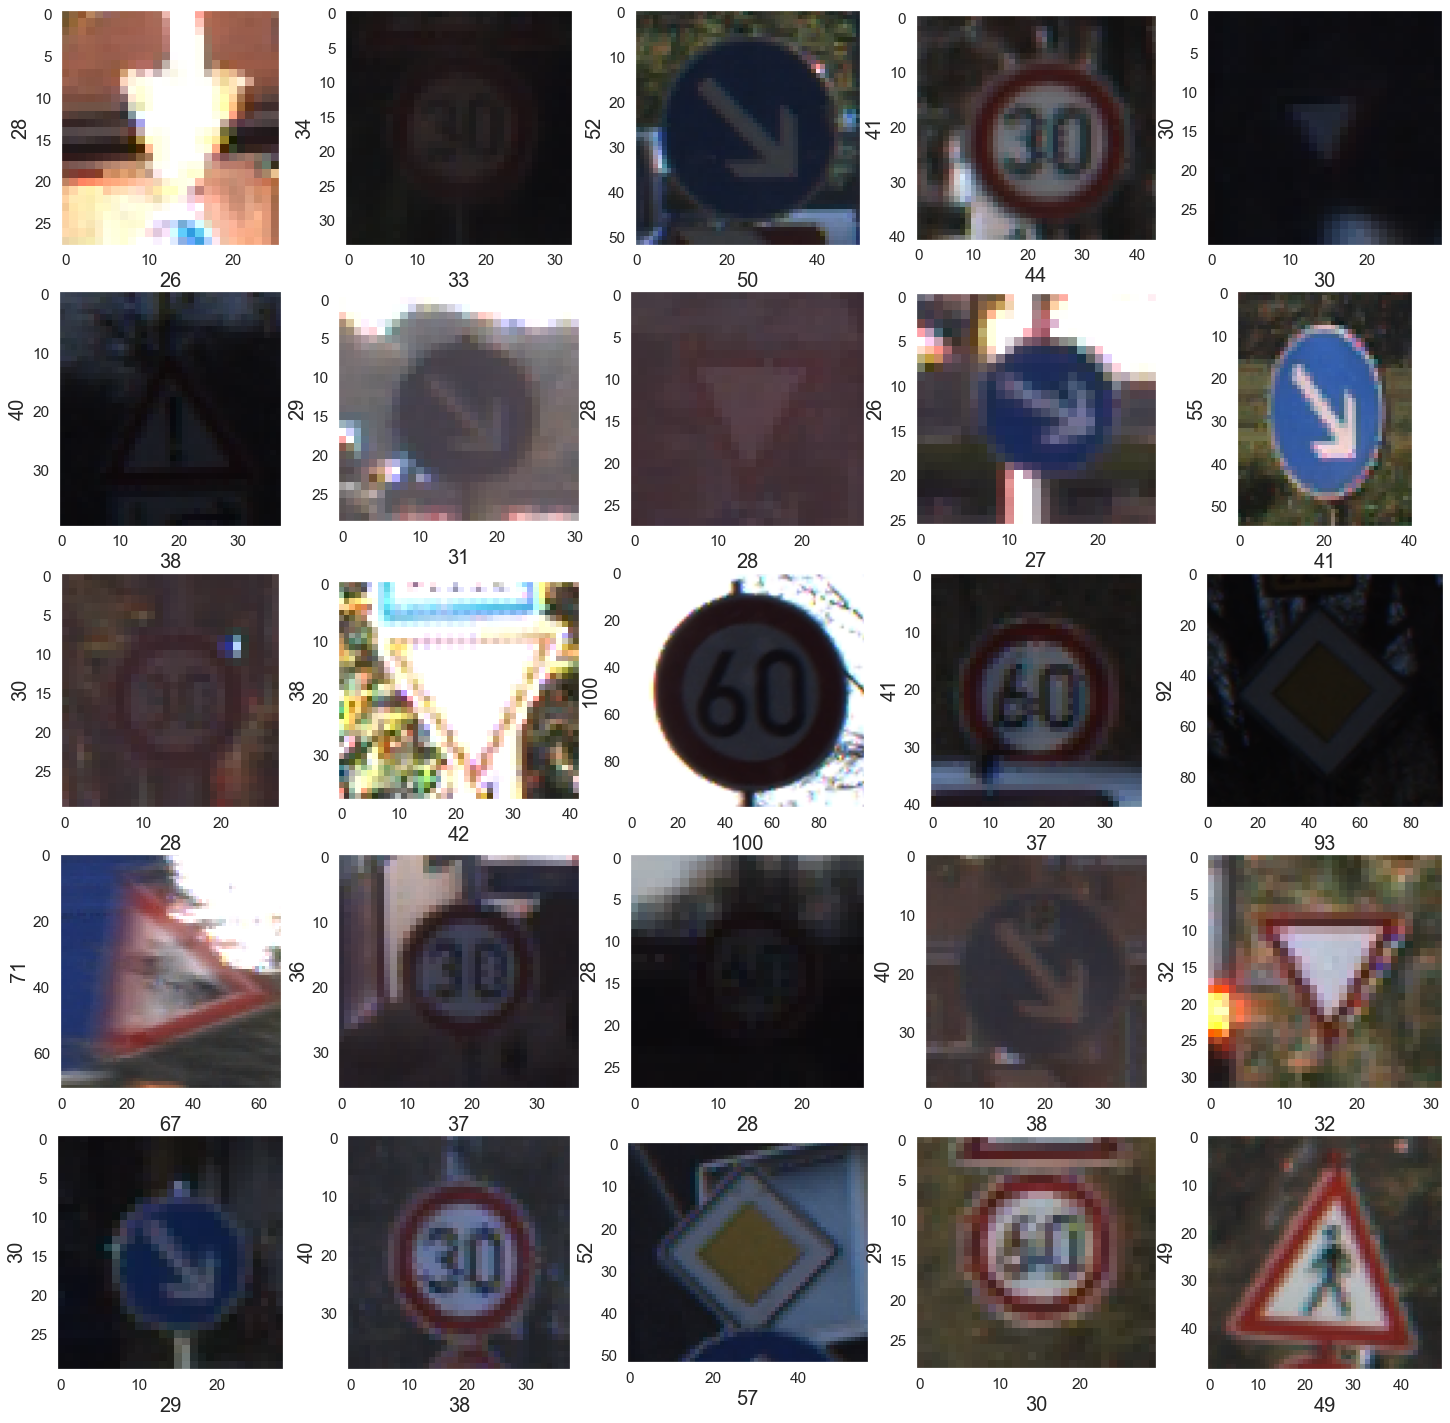

In [633]:
# Visualizing 25 random images from train data (Done by Leong Wai Yin)
images = train["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = "input\\" + random.choice(images)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=False)
    plt.xlabel(rand_img.shape[1], fontsize = 20) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20) # height of image

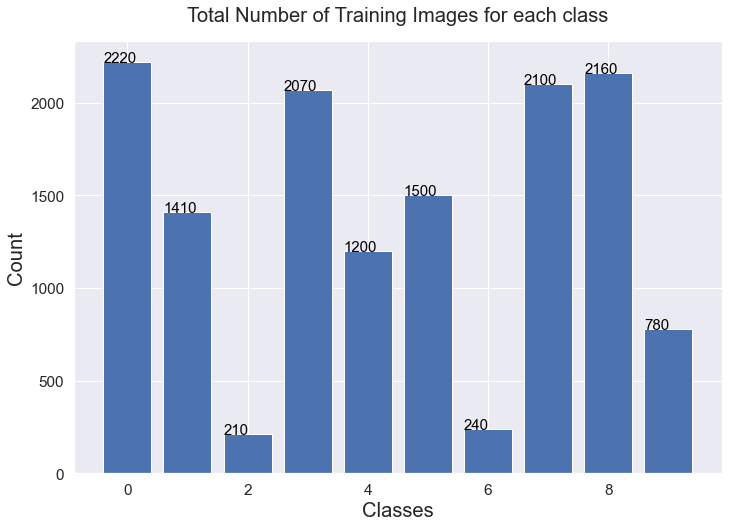

In [634]:
# Number of images per class in train data (Done by Leong Wai Yin)

unique_class, counts_class = np.unique(train_y, return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(unique_class,counts_class)
ax.set_xlabel('Classes', fontsize='large')
ax.set_ylabel('Count', fontsize='large')
ax.set_title('Total Number of Training Images for each class', fontsize='large', pad=20)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.03,str(round((i.get_height()), 1)), fontsize=15,color='black')
plt.show()

<IPython.core.display.Javascript object>


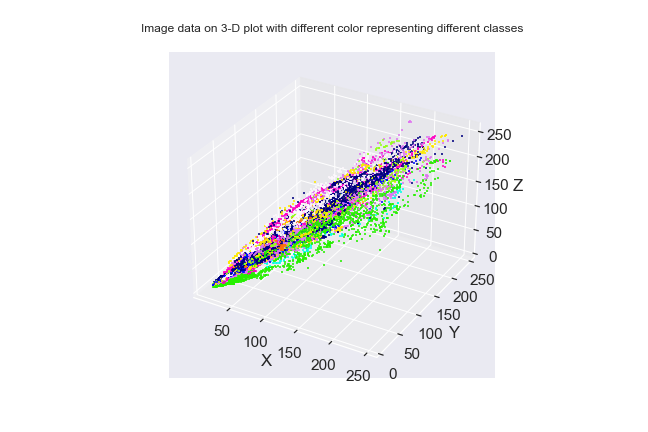

In [635]:
# Visualization of images on 3-D plot with classes (Done by Everyone)

# Creating array for all 3 axes
x=[]
y=[]
z=[]

for i in range(0,train_x_vis.shape[0]):
    temp = train_x_vis[i][0][0]
    x.append(temp[0])
    y.append(temp[1])
    z.append(temp[2])

# Plotting 3-D graph

%matplotlib notebook
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c = train_y,s=1, alpha=0.8,cmap="gist_ncar",marker=',')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Image data on 3-D plot with different color representing different classes', fontsize='large', pad=20)

plt.show()

**Data Pre-processing** (Done by P'ng Xun)

In [636]:
# Dimensions of train and test data

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape) 

(13890, 30, 30, 3) (13890,) (4530, 30, 30, 3) (4530,)


In [637]:
# Resizing images to fit SVM and RF

train_x.resize(13890,2700)
test_x.resize(4530,2700)

In [638]:
# Normaliazing data for SVM and RF

train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

In [639]:
# Creating blank dataframe to store model scores

df_scores  = pd.DataFrame(columns = ['Model', 'Score', 'Value'])
df_model = pd.DataFrame(columns = ['Model','Accuracy (%)','Time (mins)'])

**Implementation of different classifiers**

***SVM Classifier*** (Done by P'ng Xun)

In [640]:
# Defining SVM model

svm_clf = svm.NuSVC(nu=0.05,kernel='rbf',gamma=0.00001,random_state=121)

In [641]:
# Fitting SVM

tic = time.perf_counter()

svm_clf.fit(train_x, train_y)

toc = time.perf_counter()
m_svm, s_svm = divmod((toc - tic), 60)
time_svm=float(str(str(int(m_svm))+"."+str(int(m_svm))))

In [642]:
# Predicting values for test data

y_pred_svm = svm_clf.predict(test_x)

In [643]:
# Calculating recall, precision, f1 score and accuracy of SVM

recall_svm = metrics.recall_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Recall",recall_svm]

precision_svm = metrics.precision_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Precision",precision_svm]

f1_svm = metrics.f1_score(test_y, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","F1",f1_svm]

acc_svm=metrics.accuracy_score(test_y,y_pred_svm)
df_scores.loc[len(df_scores)] = ["SVM","Accuracy",acc_svm]

df_model.loc[len(df_model)] = ["SVM",acc_svm*100,time_svm]
acc_svm

0.9362030905077263

***SVM Results*** (Done by Lai Xin Yi)

In [644]:
# Classification report for SVM

print("Classification report for SVM classifier %s:\n%s\n"
      % (svm_clf, metrics.classification_report(test_y, y_pred_svm)))

Classification report for SVM classifier NuSVC(gamma=1e-05, nu=0.05, random_state=121):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       720
           1       0.95      0.96      0.96       450
           2       1.00      0.82      0.90        60
           3       0.95      0.98      0.97       690
           4       0.88      0.76      0.82       390
           5       0.89      0.91      0.90       480
           6       0.72      0.55      0.62        60
           7       0.96      0.95      0.96       690
           8       0.98      0.98      0.98       720
           9       0.96      0.91      0.94       270

    accuracy                           0.94      4530
   macro avg       0.92      0.88      0.90      4530
weighted avg       0.94      0.94      0.93      4530




In [645]:
print ("The Confusion Matrix of SVM classifier:\n")
print (metrics.confusion_matrix(test_y, y_pred_svm))

The Confusion Matrix of SVM classifier:

[[707   6   0   0   0   5   0   1   1   0]
 [  4 433   0   4   1   4   0   2   2   0]
 [  0   0  49  11   0   0   0   0   0   0]
 [  0   3   0 676   0   0   1   1   9   0]
 [ 29   6   0   9 298  19  11  18   0   0]
 [  5   2   0   2  24 436   1   1   0   9]
 [ 22   0   0   0   0   5  33   0   0   0]
 [ 13   0   0   5  14   0   0 654   4   0]
 [  0   0   0   3   2   4   0   2 709   0]
 [  0   4   0   0   1  18   0   0   1 246]]


***Random Forest*** (Done by Leong Wai Yin)

In [571]:
# Creating list of number of trees

tree_list = [100,200,300,500,700,1000]

In [572]:
y_pred_list=[]
time_rf_list=[]
rf_accuracy=[]
for n in tree_list:
    
    # Defining RF model with 'n' trees
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42,criterion='entropy')
    tic = time.perf_counter()
    
    # Fitting RF
    rf_clf.fit(train_x, train_y)
    toc = time.perf_counter()
    
    # Predicting values for test data
    y_pred_list.append(rf_clf.predict(test_x))
    
    # Calculating time taken
    m_rf, s_rf = divmod((toc - tic), 60)
    time_rf_list.append(float(str(str(int(m_rf))+"."+str(int(m_rf)))))
    
    # Calculating accuracy of RF
    rf_accuracy.append(metrics.accuracy_score(test_y,rf_clf.predict(test_x)))

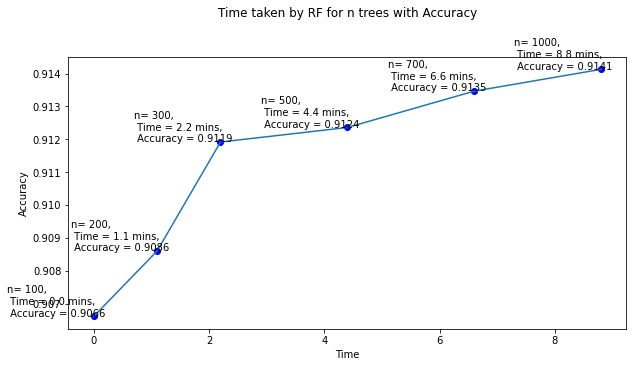

In [573]:
# Plotting time and accuracy for all RF models
# Epochs vs Accuracy
%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.plot(time_rf_list,rf_accuracy,'bo')
ax.plot(time_rf_list,rf_accuracy)

ax.set_title('Time taken by RF for n trees with Accuracy',pad=40)
ax.set_xlabel('Time')  
ax.set_ylabel('Accuracy')

for x,y,i in zip(time_rf_list,rf_accuracy,tree_list):

    label = "n= {},\n Time = {} mins,\n Accuracy = {} ".format(i,round(x,4),round(y,4))
    ax.text(x-1.5,y,label, fontsize=10)
plt.show()  

In [620]:
# Selecting best RF model

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42,criterion='entropy')
y_pred_rf = y_pred_list[5]
time_rf = time_rf_list[5]

acc_rf = rf_accuracy[5]
df_scores.loc[len(df_scores)] = ["RF","Accuracy",acc_rf]

df_model.loc[len(df_model)] = ["RF",acc_rf*100,time_rf]
acc_rf

0.9123620309050773

***Random Forest Results*** (Done by Lai Xin Yi)

In [621]:
# Calculating recall, precision and f1 score for RF

recall_rf = metrics.recall_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","Recall",recall_rf]

precision_rf = metrics.precision_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","Precision",precision_rf]

f1_rf = metrics.f1_score(test_y, y_pred_rf,average='macro')
df_scores.loc[len(df_scores)] = ["RF","F1",f1_rf]

In [622]:
# Classification report for RF

print("Classification report for RF classifier %s:\n%s\n"
      % (rf_clf, metrics.classification_report(test_y, y_pred_rf)))

Classification report for RF classifier RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42):
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       720
           1       0.87      0.84      0.85       450
           2       1.00      0.97      0.98        60
           3       0.95      0.98      0.97       690
           4       0.88      0.77      0.82       390
           5       0.86      0.90      0.88       480
           6       1.00      0.35      0.52        60
           7       0.95      0.91      0.93       690
           8       0.99      0.96      0.98       720
           9       1.00      1.00      1.00       270

    accuracy                           0.91      4530
   macro avg       0.93      0.86      0.88      4530
weighted avg       0.92      0.91      0.91      4530




In [650]:
print ("The Confusion Matrix of Random Forest classifier:\n")
print (metrics.confusion_matrix(test_y, y_pred_rf))

The Confusion Matrix of Random Forest classifier:

[[678  39   0   0   0   2   0   0   1   0]
 [ 73 376   0   0   0   0   0   0   1   0]
 [  0   0  58   0   0   2   0   0   0   0]
 [  3   9   0 678   0   0   0   0   0   0]
 [ 22   3   0   0 300  33   0  31   1   0]
 [  9   4   0   2  33 432   0   0   0   0]
 [  0   0   0   0   4  35  21   0   0   0]
 [ 35   0   0  20   5   0   0 629   1   0]
 [ 16   0   0  12   0   0   0   1 691   0]
 [  0   0   0   0   0   0   0   0   0 270]]


***CNN Implementation*** (Done by Liaw Mun Kin)

In [651]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [652]:
# Label the classes
classes = {0:'Speed limit (30km/h)', 
           1:'Speed limit (60km/h)', 
           2:'Go straight or left', 
           3:'Keep right', 
           4:'General caution', 
           5:'Road work', 
           6:'Pedestrians',  
           7:'Priority road', 
           8:'Yield', 
           9:'Stop' }

In [653]:
def load_data(data_dir):
    '''
    Loading data from Train folder.
    
    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. 
    `labels` is a list of integer labels, representing the categories for each of the
    corresponding `images`.
    '''
    images = list()
    labels = list()
    for category in range(num_classes):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(HEIGHT, WIDTH))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [654]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

In [655]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9723, 30, 30, 3)
Shape of X_test: (4167, 30, 30, 3)
Shape of y_train: (9723, 10)
Shape of y_test: (4167, 10)


In [656]:
# Building the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(HEIGHT,WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 4, 4, 64)        

In [657]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 4, 4, 64)        

In [658]:
# setting up the loss function, optimizer and metrics
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
# Fitting the model
ep = 20
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test), 
                    epochs=ep, 
                    steps_per_epoch = 30
                   )

Epoch 1/20
30/30 [==============================] - 6s 216ms/step - loss: 7.5493 - accuracy: 0.2609 - val_loss: 1.7020 - val_accuracy: 0.5644
Epoch 2/20
30/30 [==============================] - 5s 176ms/step - loss: 1.4385 - accuracy: 0.5479 - val_loss: 0.9514 - val_accuracy: 0.7665
Epoch 3/20
30/30 [==============================] - 5s 177ms/step - loss: 0.7809 - accuracy: 0.7549 - val_loss: 0.4477 - val_accuracy: 0.8738
Epoch 4/20
30/30 [==============================] - 6s 201ms/step - loss: 0.4586 - accuracy: 0.8480 - val_loss: 0.2479 - val_accuracy: 0.9527
Epoch 5/20
30/30 [==============================] - 6s 201ms/step - loss: 0.2882 - accuracy: 0.9099 - val_loss: 0.1393 - val_accuracy: 0.9750
Epoch 6/20
30/30 [==============================] - 6s 201ms/step - loss: 0.2096 - accuracy: 0.9360 - val_loss: 0.1023 - val_accuracy: 0.9818
Epoch 7/20
30/30 [==============================] - 6s 202ms/step - loss: 0.1677 - accuracy: 0.9529 - val_loss: 0.0798 - val_accuracy: 0.9899
Epoch 

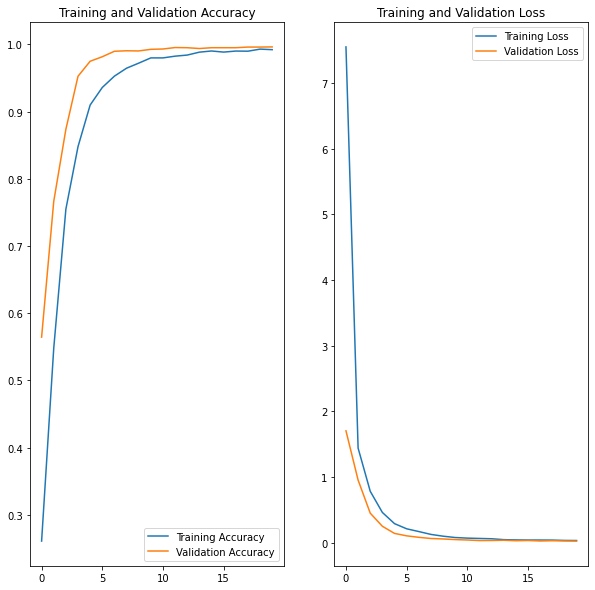

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(ep)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#save the trained model to avoid re-training the model (time consuming process)
tf.saved_model.save(model, "model_trained")

In [35]:
Y_test = pd.read_csv('Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img("input/" + img, target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
y_pred_cnn = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ', metrics.accuracy_score(test_labels, y_pred_cnn)*100)

Test Data accuracy:  96.7991169977925


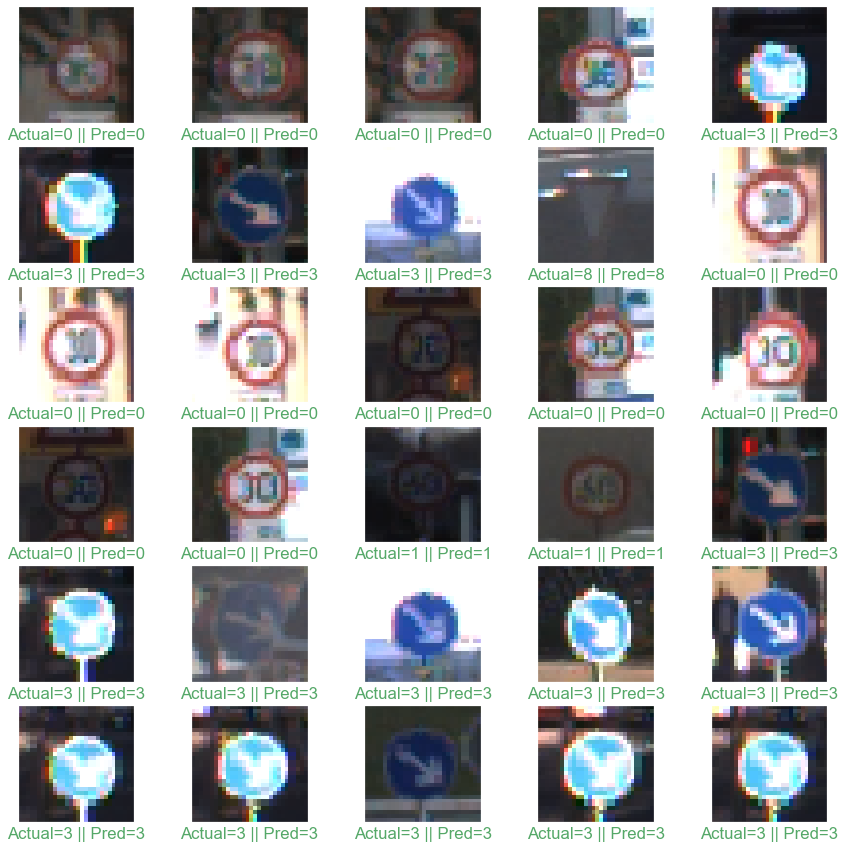

In [47]:
plt.figure(figsize = (15, 15))

start_index = 0
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred_cnn[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

***Convolutional Neural Network Results*** (Done by Lai Xin Yi)

In [42]:
# Calculate the recall, precision and f1 score of the CNN model
recall_cnn = metrics.recall_score(test_labels, y_pred_cnn,average='macro')

precision_cnn = metrics.precision_score(test_labels, y_pred_cnn,average='macro')

f1_cnn = metrics.f1_score(test_labels,y_pred_cnn,average='macro')

acc_cnn=metrics.accuracy_score(test_labels,y_pred_cnn)

In [41]:
print("Classification report for CNN classifier %s:\n%s\n"
      % (model, metrics.classification_report(test_labels, y_pred_cnn)))

Classification report for CNN classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000245DE2BFA00>:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       720
           1       0.97      0.99      0.98       450
           2       0.94      1.00      0.97        60
           3       0.98      0.98      0.98       690
           4       0.93      0.91      0.92       390
           5       0.94      0.95      0.94       480
           6       0.59      0.55      0.57        60
           7       1.00      0.96      0.98       690
           8       0.99      0.99      0.99       720
           9       1.00      1.00      1.00       270

    accuracy                           0.97      4530
   macro avg       0.93      0.93      0.93      4530
weighted avg       0.97      0.97      0.97      4530




In [44]:
cf = metrics.confusion_matrix(test_labels, y_pred_cnn)

<AxesSubplot:>

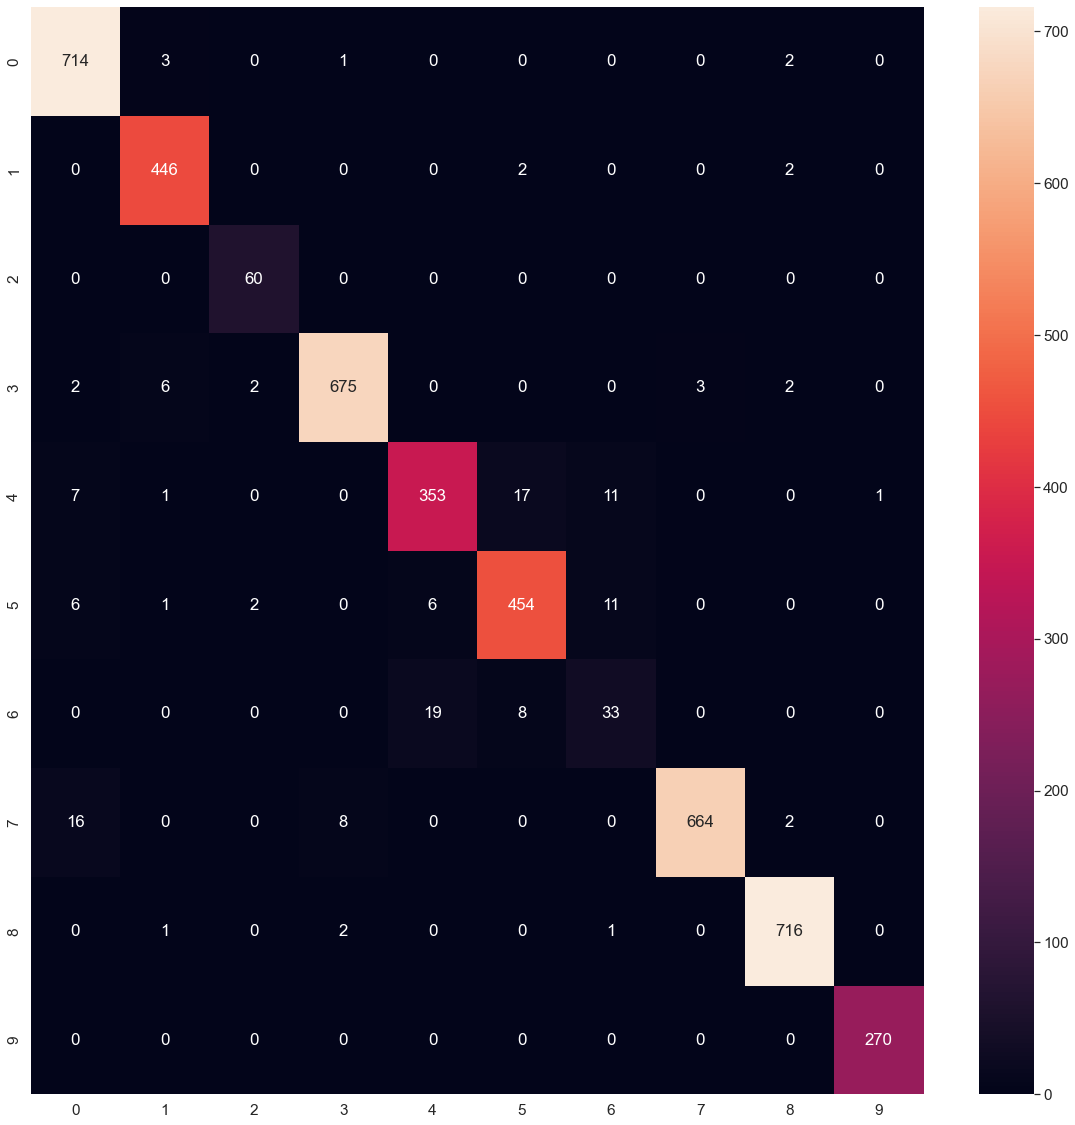

In [45]:
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt="d")